In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

# Load the dataset
data = pd.read_csv("/kaggle/input/similaritywithoutmodel/mergedall2r.csv")
data.head()

,I,M,R,D,SN (number of sections of citing paper in which a particular citation occurs),Total Occur.,Similarity,SimilarityT,CitationClass
0,0,0,0,1,1,1,0.96,0.77,0
1,1,0,0,0,1,1,0.97,0.72,0
2,0,0,1,0,1,1,0.93,0.65,0
3,0,0,1,0,1,1,0.95,0.66,0
4,0,0,0,1,1,1,0.89,0.69,0


Label Counts:
 0    345
1     66
Name: CitationClass, dtype: int64


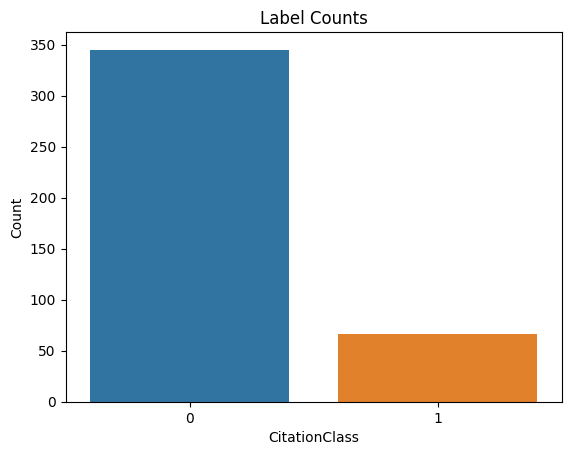

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print the count of 0 and 1 labels
print("Label Counts:\n", data["CitationClass"].value_counts())

# Plot a bar graph of the label counts
sns.countplot(data=data, x="CitationClass")
plt.xlabel("CitationClass")
plt.ylabel("Count")
plt.title("Label Counts")
plt.show()

# ****Balancing the dataset

In [5]:
from imblearn.over_sampling import SMOTE
# Separate the features and target variable
X = data.drop('CitationClass', axis=1)
y = data['CitationClass']

# Apply SMOTE
sm = SMOTE(sampling_strategy=1.0, random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Create a new balanced dataset
balanced_set = pd.concat([X_res, y_res], axis=1)

In [7]:
output_path = '/kaggle/working/'
balanced_set.to_csv(output_path + 'balanced_dataset1.csv', index=False)

In [9]:
df = pd.read_csv("/kaggle/working/balanced_dataset1.csv")
df.head()

,I,M,R,D,SN (number of sections of citing paper in which a particular citation occurs),Total Occur.,Similarity,SimilarityT,CitationClass
0,0,0,0,1,1,1,0.96,0.77,0
1,1,0,0,0,1,1,0.97,0.72,0
2,0,0,1,0,1,1,0.93,0.65,0
3,0,0,1,0,1,1,0.95,0.66,0
4,0,0,0,1,1,1,0.89,0.69,0


Label Counts:
 0    345
1    345
Name: CitationClass, dtype: int64


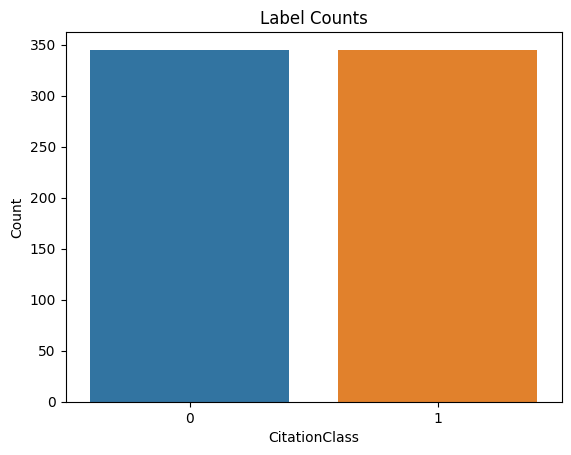

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print the count of 0 and 1 labels
print("Label Counts:\n", df["CitationClass"].value_counts())

# Plot a bar graph of the label counts
sns.countplot(data=df, x="CitationClass")
plt.xlabel("CitationClass")
plt.ylabel("Count")
plt.title("Label Counts")
plt.show()

# ******Applying machin learning model**

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from keras.models import Sequential
from keras.layers import GRU, Dense, Conv1D, MaxPooling1D, LSTM
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten

In [13]:
# Split the dataset into training and testing sets
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Preprocess the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# ****Defining the models

In [20]:
# define models
gru_model = Sequential()
gru_model.add(GRU(units=16, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dense(units=1, activation='sigmoid'))
gru_model.compile(optimizer='adam', loss='binary_crossentropy')

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=1, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy')

lstm_model = Sequential()
lstm_model.add(LSTM(units=16, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(units=1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy')

ann_model = Sequential()
ann_model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(units=1, activation='sigmoid'))
ann_model.compile(optimizer='adam', loss='binary_crossentropy')

# ****Fitting the models

In [ ]:
gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
14/14 [==============================] - 0s 11ms/step - loss: 0.3303 - val_loss: 0.4911
Epoch 2/100
14/14 [==============================] - 0s 8ms/step - loss: 0.3290 - val_loss: 0.4922
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 0.3286 - val_loss: 0.4934
Epoch 4/100
14/14 [==============================] - 0s 8ms/step - loss: 0.3261 - val_loss: 0.4941
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 0.3256 - val_loss: 0.4948
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 0.3254 - val_loss: 0.4936
Epoch 7/100
14/14 [==============================] - 0s 10ms/step - loss: 0.3260 - val_loss: 0.4962
Epoch 8/100
14/14 [==============================] - 0s 9ms/step - loss: 0.3284 - val_loss: 0.4916
Epoch 9/100
14/14 [==============================] - 0s 9ms/step - loss: 0.3256 - val_loss: 0.4979
Epoch 10/100
14/14 [==============================] - 0s 8ms/step - loss: 0.3235 - val_loss: 0.4988
Epoch 

# **GRU Predication**

In [ ]:
gru_y_pred = gru_model.predict(X_test)
gru_y_pred = np.round(gru_y_pred).astype(int)
gru_accuracy = accuracy_score(y_test, gru_y_pred)
gru_precision = precision_score(y_test, gru_y_pred)
gru_recall = recall_score(y_test, gru_y_pred)
print("Accuracy:", gru_accuracy)
print("Precision:",gru_precision)
print("Recall:", gru_recall)

# **CNN Prediction**

In [23]:
cnn_y_pred = cnn_model.predict(X_test)
cnn_y_pred = np.round(cnn_y_pred).astype(int)
cnn_accuracy = accuracy_score(y_test, cnn_y_pred)
cnn_precision = precision_score(y_test, cnn_y_pred)
cnn_recall = recall_score(y_test, cnn_y_pred)
print("Accuracy:", cnn_accuracy)
print("Precision:",cnn_precision)
print("Recall:", cnn_recall)

5/5 [==============================] - 0s 2ms/step
Accuracy: 0.7971014492753623
Precision: 0.8421052631578947
Recall: 0.7164179104477612


# **LSTM Prediction**

In [24]:
lstm_y_pred = lstm_model.predict(X_test)
lstm_y_pred = np.round(lstm_y_pred).astype(int)
lstm_accuracy = accuracy_score(y_test, lstm_y_pred)
lstm_precision = precision_score(y_test, lstm_y_pred)
lstm_recall = recall_score(y_test, lstm_y_pred)
print("Accuracy:", lstm_accuracy)
print("Precision:",lstm_precision)
print("Recall:", lstm_recall)

5/5 [==============================] - 0s 2ms/step
Accuracy: 0.7608695652173914
Precision: 0.84
Recall: 0.6268656716417911


# **ANN Preddiction**

In [25]:
ann_y_pred = ann_model.predict(X_test)
ann_y_pred= np.round(ann_y_pred).astype(int)
ann_accuracy = accuracy_score(y_test, ann_y_pred)
ann_precision = precision_score(y_test, ann_y_pred)
ann_recall = recall_score(y_test, ann_y_pred)
print("Accuracy:", ann_accuracy)
print("Precision:",ann_precision)
print("Recall:", ann_recall)

5/5 [==============================] - 0s 2ms/step
Accuracy: 0.8188405797101449
Precision: 0.85
Recall: 0.7611940298507462


# **Comparision**

In [26]:
results = pd.DataFrame({
    'Model': ['GRU','CNN', 'LSTM','ANN'],
    'Precision': [gru_precision,cnn_precision, lstm_precision,ann_precision],
    'Recall': [gru_recall,cnn_recall, lstm_recall,ann_recall],
    'Accuracy': [gru_accuracy,cnn_accuracy, lstm_accuracy,ann_accuracy]
})
print(results)

  Model  Precision    Recall  Accuracy
0   GRU   0.875000  0.626866  0.775362
1   CNN   0.842105  0.716418  0.797101
2  LSTM   0.840000  0.626866  0.760870
3   ANN   0.850000  0.761194  0.818841


  Model  Precision    Recall  Accuracy
0   GRU   0.875000  0.626866  0.775362
1   CNN   0.842105  0.716418  0.797101
2  LSTM   0.840000  0.626866  0.760870
3   ANN   0.850000  0.761194  0.818841


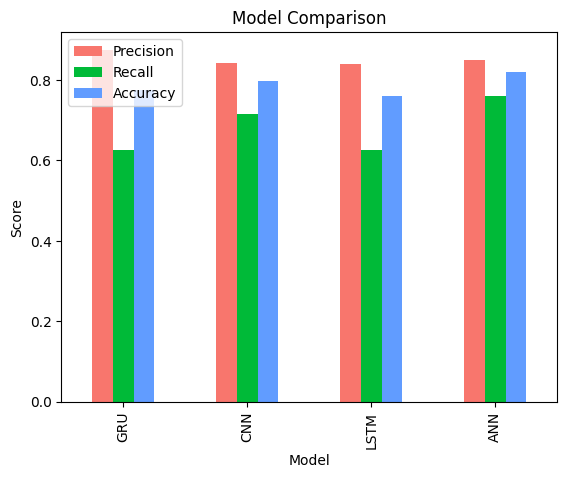

In [28]:
df_results = pd.DataFrame.from_dict(results)

# Display the table
print(df_results)
colors = ['#F8766D', '#00BA38', '#619CFF', '#F564E3']
# Plot the results
df_results.plot(x='Model', y=['Precision', 'Recall', 'Accuracy'], kind='bar',color=colors)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()